# **Predicting Heart Attacks With TensorFlow Deep Learning**

### About the Dataset

**This dataset contains a series of recorded medical attributes from patients with varying likelihoods of heart attack.**

*From the University California, Irvine Machine Learning Repository:*

<br>
Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Of the four original datasets (Cleveland, Hungary, Switzerland, VA Long Beach), only the Cleveland dataset it used.

The original 76 attributes recorded in the study was narrowed down to 14 (13 features and a predicted value).

<br>
The features used are:

1) age<br>
2) sex<br>
3) chest pain type (4 values)<br>
4) resting blood pressure<br>
5) serum cholestoral in mg/dl<br>
6) fasting blood sugar > 120 mg/dl<br>
7) resting electrocardiographic results (values 0,1,2)<br>
8) maximum heart rate achieved<br>
9) exercise induced angina<br>
10) oldpeak = ST depression induced by exercise relative to rest<br>
11) the slope of the peak exercise ST segment<br>
12) number of major vessels (0-3) colored by flourosopy<br>
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect<br>

<br>
The predicted value is based on the likelihood of a heart attack occurring:
- Value 0: < 50% diameter narrowing in any major vessel
- Value 1: > 50% diameter narrowing in any major vessel

## Training a Deep Learning Model to Predict Heart Attack Likelihood

#### *Brief Overview:*
We will use TensorFlow and Keras to train a model on the dataset.

* To begin, we will load the .csv data in a Pandas DataFrame using the pd.read_csv() method.
* We will then format the data into a numpy array in order to simplify the process.
* From here, we will process the data and feed it into a TensorFlow ANN with a single hidden layer.
* Finally, we will examine the prediction accuracy of the model.


### Import dependencies

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Loading data

We being by loading the .csv file using pd.read_csv().

Additionally, we see some preliminary stats about the data.

In [3]:
heart_df = pd.read_csv("heart.csv")
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data preprocessing

We now convert the Pandas DataFrame into a numpy array, for easier use with TensorFlow.

We also shuffle the array to avoid any inherent bias in the data.

In [4]:
heart_np = heart_df.to_numpy()

np.random.shuffle(heart_np)

We allocate 80% of the data to the training set and 20% to the test set.

In [5]:
train_test_split = .8

num_examples = heart_np.shape[0]
num_train_examples = int(np.floor(num_examples*train_test_split))
num_test_examples = int(np.ceil(num_examples*(1 - train_test_split)))

print("Training Examples:", num_train_examples)
print("Test Examples:", num_test_examples)
print("\nTotal Examples:", num_examples)

Training Examples: 242
Test Examples: 61

Total Examples: 303


We then split the dataset between train and test data, and separate the label column from each subset to obtain the necessary format for training.

In [6]:
train_data = heart_np[0:num_train_examples, :]
test_data = heart_np[num_train_examples:len(heart_np), :]

X_train = train_data[:, 0:-1]
y_train = train_data[:, -1]

X_test = test_data[:, 0:-1]
y_test = test_data[:, -1]

We can see that our training set contains 242 training examples.<br>
Our input has 13 features and our output will be a single column used for binary classification.

In [7]:
print(X_train.shape)
print(y_train.shape)

(242, 13)
(242,)


### Building and compiling our model

We define our neural network model with a single hidden layer consisting on 16 activation nodes.<br>
A simple design like this works best for a smaller dataset.

In [8]:
inputs = keras.Input(shape=(13), name="features")
x = layers.Dense(16, activation="relu", name="dense_1")(inputs)
outputs = layers.Dense(2, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_1 (Dense)             (None, 16)                224       
                                                                 
 predictions (Dense)         (None, 2)                 34        
                                                                 
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________


We will train our model with a batch size of 64 and train for 300 epochs.

In [9]:
BATCH_SIZE = 64
EPOCHS = 300

We will use the Adam optimization algorithm with the standard (recommended) parameter values for $\beta_1$, $\beta_2$, and $\epsilon$.<br>
Our learning rate will be 0.001.

In [10]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

Compile the model using Keras' SparseCategoricalCrossentropy loss function.

In [11]:
model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

### Training the model

We are ready to train our model.<br>
We pass in X_train as our array of features, and use y_train as our label column.

We enable shuffling to further reduce any bias in the ordering of the training examples.

In [12]:
history = model.fit(
    X_train,
    y_train,
    shuffle=True,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/300
4/4 [==============================] - 1s 4ms/step - loss: 8.6256 - sparse_categorical_accuracy: 0.5124
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 4.1294 - sparse_categorical_accuracy: 0.6364
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 3.3745 - sparse_categorical_accuracy: 0.6777
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 4.0433 - sparse_categorical_accuracy: 0.6446
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 3.8792 - sparse_categorical_accuracy: 0.6446
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 3.3787 - sparse_categorical_accuracy: 0.6488
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 3.2293 - sparse_categorical_accuracy: 0.6405
Epoch 8/300
4/4 [==============================] - 0s 21ms/step - loss: 3.2242 - sparse_categorical_accuracy: 0.6777
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 

### Post-training evaluation

We will now examine the performance of the model on the test set.<br>
Let's create an array of predictions for the data in X_test.

In [13]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


Quickly define a function for comparing our model's predictions to the actual values in y_test.

In [14]:
def get_prediction_array(predictions, y):
    pred_arr = (predictions[:, 0] < 0.5)
    pred_arr = np.column_stack((pred_arr, y))
    return pred_arr

We tally up the number of correct predictions and obtain a percentage for accuracy of the model.

We obtain an accuracy in the 80-90% range.

In [15]:
results = get_prediction_array(predictions, y_test)

num_correct = 0

for i in range(num_test_examples):
    if results[i, 0] == results[i, 1]:
        num_correct += 1

print("Accuracy:", num_correct/num_test_examples)

Accuracy: 0.8032786885245902


We can see that TensorFlow's evaluate() function gives us the same value.

In [16]:
score = model.evaluate(X_test, y_test)
print("\nAccuracy:", score[1])

2/2 [==============================] - 0s 5ms/step - loss: 0.4942 - sparse_categorical_accuracy: 0.8033

Accuracy: 0.8032786846160889


Create an array for prediction success (1 = Correct, 0 = Incorrect).

In [17]:
performance = (results[:, 0] == results[:, 1]).astype(int)

We can see from the bar chart that our model performed fairly well.

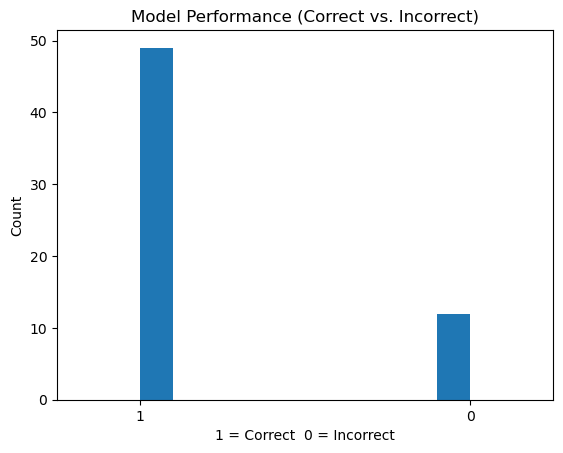

In [18]:
plt.title("Model Performance (Correct vs. Incorrect)")
plt.xlabel("1 = Correct  0 = Incorrect")
plt.ylabel("Count")
plt.xticks([1, 0])
plt.xlim(1.25, -0.25)

plt.hist(performance)
plt.show()

# Export the model as TFLite and SavedModel

In [23]:
# Export saved model version.
model.save('./model.h5')

In [31]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\micro\AppData\Local\Temp\tmpuz4r8o42\assets
